# Question 5
PCA on MNIST data

In [128]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
(x_train, y_train), (x_test, y_test)=mnist.load_data()#importing data
temp=[]
i=0
while len(temp)<200:#selecting first 200 items with label=3 from training set
    if y_train[i]==3:
        temp.append(x_train[i])
    i+=1
no_3_data=np.array(temp)

In [129]:
X=no_3_data.reshape(200,28*28)#reshaping data
X.shape

(200, 784)

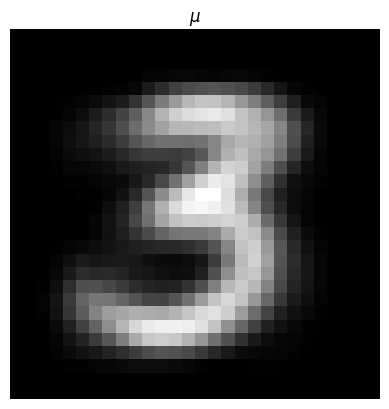

In [130]:
mu=X.mean(axis=0)#calculating mean
plt.imshow(mu.reshape(28,28),cmap='gray');
plt.title(r'$\mu$')
plt.axis('off')
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_5276\3162500136.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  new_vectors=new_vectors.astype(float)
C:\Users\shiva\AppData\Local\Temp\ipykernel_5276\3162500136.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  new_values=new_values.astype(float)


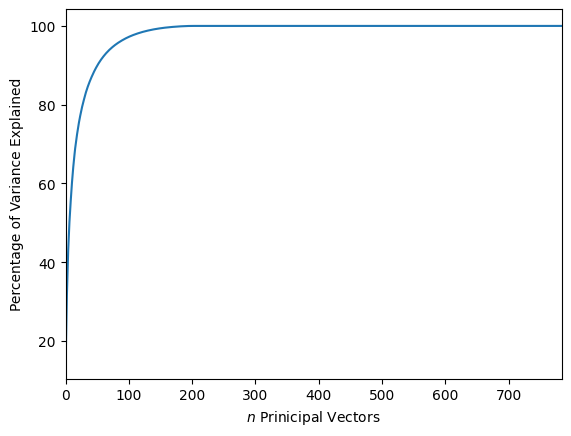

In [131]:
X=X-mu#scaling features
M=np.cov(X,rowvar=False)#creating covariance matrix
new_values,new_vectors=np.linalg.eig(M)#calculating eigenvalues and eigenvectors
idx = new_values.argsort()[::-1]#sorting eigenvalues and respective eigenvectors in descending order
new_values=new_values[idx]
new_vectors=new_vectors[:,idx]
new_vectors=new_vectors.astype(float)
new_values=new_values.astype(float)
ax=sns.lineplot(y=100*np.cumsum(new_values)/np.sum(new_values),x=[i for i in range(len(new_values))],);#plotting percentage of variance explaned vs number of principal vectors
ax.set(xlabel=r'$n$ Prinicipal Vectors',ylabel='Percentage of Variance Explained',xlim=(0,28*28))
plt.show()

As we can observe, the initial eigenvalues explain a significant percentage of the variance in our data. We will now select the first $3$ eigenvectors (principal components) and visualise them.

In [132]:
v1,v2,v3=new_vectors[:,0],new_vectors[:,1],new_vectors[:,2]

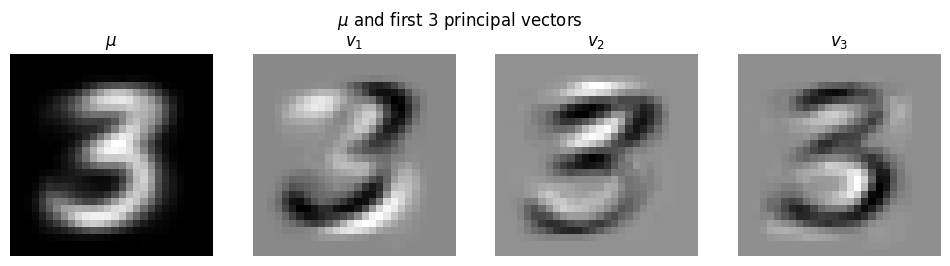

In [133]:
fig = plt.figure(figsize=(12,3))
fig.suptitle(r'$\mu$ and first $3$ principal vectors')
ax0 = fig.add_subplot(1,4,1)
plt.axis('off')
plt.title(r'$\mu$')
ax0.imshow(mu.reshape(28,28),cmap='gray');
ax1 = fig.add_subplot(1,4,2)
plt.axis('off')
plt.title(r'$v_1$')
ax1.imshow(v1.reshape(28,28),cmap='gray');
ax2 = fig.add_subplot(1,4,3)
plt.axis('off')
plt.title(r'$v_2$')
ax2.imshow(v2.reshape(28,28),cmap='gray');
ax3 = fig.add_subplot(1,4,4)
plt.axis('off')
plt.title(r'$v_3$')
ax3.imshow(v3.reshape(28,28),cmap='gray');